In [1]:
from sympy import symbols,lambdify
import numpy as np
import matplotlib.pyplot as plt
def cs(x,y):
    s=0
    for i in range(len(y)):
        wk=1
        for k in range(len(y)):
            if k!=i:
                wk=wk*(x[i]-x[k])
        s=s+y[i]/wk
    return s
def Newton(X,Y):
    x=symbols('x')
    N=Y[0]
    df=[]
    wx=[]
    wxi=1
    for i in range(len(Y)-1):
        fi=cs(X[:i+2],Y[:i+2])
        df.append(fi)
        wi=x-X[i]
        wxi=wxi*wi
        wx.append(wxi)
    for i in range(len(Y)-1):
        N=N+df[i]*wx[i]
    return N
def feval(x,expression):
    t=symbols('x')
    f=lambdify(t,expression)
    return f(x)  
def Lagrange(X,y,n):
    t=symbols('x')
    f=0
    L=[]
    for i in range(n+1):
        p=1
        q=1
        for j in range(n+1):
            if i != j:
                p=p*(t-X[j])
                q=q*(X[i]-X[j])
        if p!=1 and q!=1:
            l=p/q
            L.append(l)
    for i in range(n+1):
        li=y[i]*L[i]
        f+=li
    return f
def liner(X,Y):
    F=[]
    for i in range(len(X)-1):
        fi=Lagrange(X[i:i+2],Y[i:i+2],1)
        F.append(fi)
    return F

0.0
0.0


Text(0, 0.5, 'value')

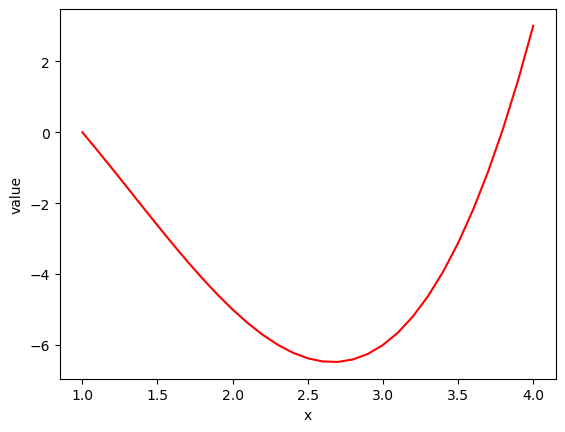

In [2]:
import math
X=[1,2,3,4]
fx=[0,-5,-6,3]
n_value=feval(2.5,Newton(X,fx))
l_value=feval(2.5,Lagrange(X,fx,3))
print(abs(n_value+6.375))
print(abs(l_value+6.375))
Newton(X,fx)
x=np.arange(1,4.1,0.1)
y=[feval(i,Newton(X,fx)) for i in x]
plt.plot(x,y,'r')
plt.xlabel('x')
plt.ylabel('value')

f(0.54)的各阶Newton插值近似值依次为：[-0.5135358304416624, -0.6219605459527819, -0.6166480439905031, -0.6162762462459608, -0.6162121010905011, -0.6161955748474666, -0.6161901506336736, -0.6161880501417589, -0.616187131941927, -0.6161866914250596, -0.6161864638778383, -0.6161863390497002, -0.6161862670598448, -0.6161862237508924, -0.6161861967364004]


Text(0, 0.5, 'errors')

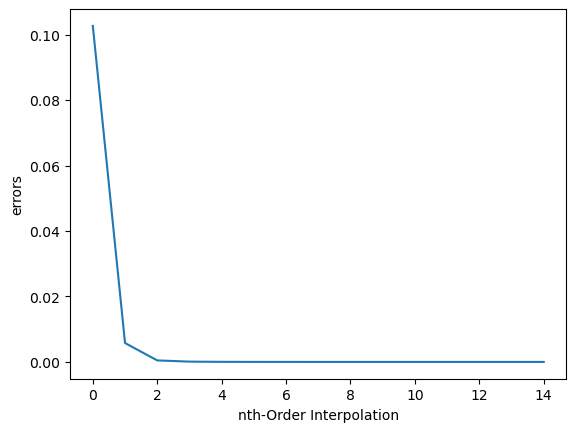

In [3]:
import numpy as np
x=np.arange(0.3,1.9,0.1)
fx=[math.log(i) for i in x]
N=[Newton(x[:i],fx[:i]) for i in range(2,17)]
fn_value=[feval(0.54,N[i]) for i in range(15)]
print('f(0.54)的各阶Newton插值近似值依次为：'+str(fn_value))
errors=[abs(fn_value[i]-math.log(0.54)) for i in range(15)]
import matplotlib.pyplot as plt
plt.plot(range(15),errors)
plt.xlabel('nth-Order Interpolation')
plt.ylabel('errors')

In [4]:
x=[np.linspace(-20,20,i) for i in [2,6,11,21,51]]
xi=[]
fx=[]
y=[]
f=lambda x:3/(40+x**2)
for i in range(5):
    m=x[i]
    X=x[i]
    fxi=[f(j) for j in X]
    fx.append(fxi)
    for j in range(len(x[i])):
        xx=[(m[i]+m[i+1])/2 for i in range(len(m)-1)]
    xi.append(xx)


In [11]:
f_x=[]
for i in range(5):
    f_x_i=[feval(j,Newton(x[i],fx[i])) for j in xi[i]]
    f_x.append(f_x_i)

In [12]:
# e=[]
# import pandas as pd
# for j in range(5):
    
#     errors=[abs(f(i)-flin[j][k]) for k,i in pd.Series(xi[j]).items()]
#     e.append(errors)
# for k,i in pd.Series([1,5,10,20,50]).items():
    
#     display('%d次插值多项式在各点的误差'%i +str(e[k]))

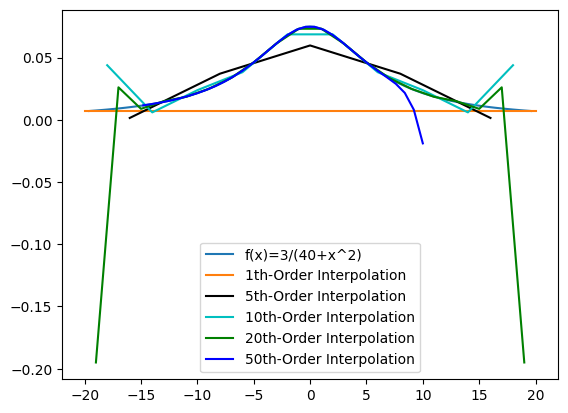

In [13]:
import pandas as pd
xx=xi[0]+xi[1]+xi[2]+xi[3]+xi[4]
xx.sort()
xx=pd.Series(xx)
xx=xx.drop_duplicates()
ff=[f(i) for i in xx]
x1=[-20,0,20]
fx1=[f_x[0],f_x[0],f_x[0]]
plt.plot(xx,ff,label='f(x)=3/(40+x^2)')
plt.legend()
plt.plot(x1,fx1,label='1th-Order Interpolation')
plt.legend()
plt.plot(xi[1],f_x[1],'k',label='5th-Order Interpolation')
plt.legend()
plt.plot(xi[2],f_x[2],'c',label='10th-Order Interpolation')
plt.legend()
plt.plot(xi[3],f_x[3],'g',label='20th-Order Interpolation')
plt.legend()
plt.plot(xi[4][6:38],f_x[4][6:38],'b',label='50th-Order Interpolation')
plt.legend()
plt.show()

In [14]:
Liner=[]
for i in range(5):
    li=liner(x[i],fx[i])
    Liner.append(li)
flin=[]
for i in range(5):
    xx=xi[i]
    flini=Liner[i]
    fxx=[]
    for j in range(len(xx)):
        fxxi=feval(xx[j],flini[j])
        fxx.append(fxxi)
    flin.append(fxx)

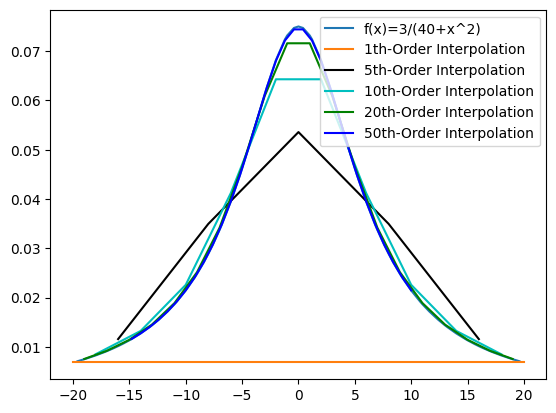

In [15]:
import pandas as pd
xx=xi[0]+xi[1]+xi[2]+xi[3]+xi[4]
xx.sort()
xx=pd.Series(xx)
xx=xx.drop_duplicates()
ff=[f(i) for i in xx]
x1=[-20,0,20]
fx1=[f_x[0],f_x[0],f_x[0]]
plt.plot(xx,ff,label='f(x)=3/(40+x^2)')
plt.legend()
plt.plot(x1,fx1,label='1th-Order Interpolation')
plt.legend()
plt.plot(xi[1],flin[1],'k',label='5th-Order Interpolation')
plt.legend()
plt.plot(xi[2],flin[2],'c',label='10th-Order Interpolation')
plt.legend()
plt.plot(xi[3],flin[3],'g',label='20th-Order Interpolation')
plt.legend()
plt.plot(xi[4][6:38],flin[4][6:38],'b',label='50th-Order Interpolation')
plt.legend()
plt.show()

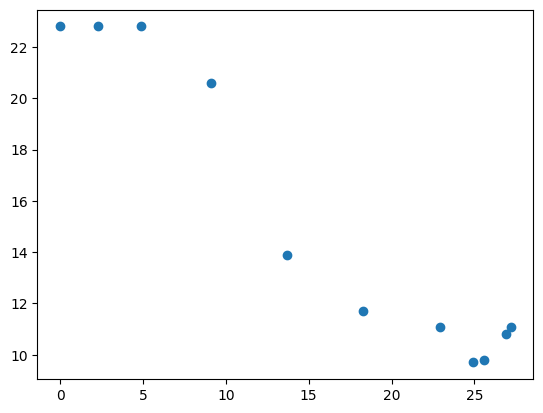

In [16]:
T=[22.8,22.8,22.8,20.6,13.9,11.7,11.1,11.1,10.8,9.8,9.7]
x=[0,2.3,4.9,9.1,13.7,18.3,22.9,27.2,26.9,25.6,24.9]
l=Lagrange(x,T,10)
n=Newton(x,T)
plt.scatter(x,T)

In [17]:
xx=np.arange(-0.2,27.5,0.1)
fl=[feval(i,l) for i in xx]

In [18]:
fn=[feval(i,n) for i in xx]

In [19]:
def diff2(y1,y2,y3,y4,y5):
    return 1/(12*(0.1**2))*(-y1+16*y2-30*y3+16*y4-y5)

In [20]:
df2=[]
for i in range(273):
    di=diff2(fl[i],fl[i+1],fl[i+2],fl[i+3],fl[i+4])
    df2.append(di)

In [21]:
df2n=[abs(i) for i in df2]
df2n=pd.Series(df2n)

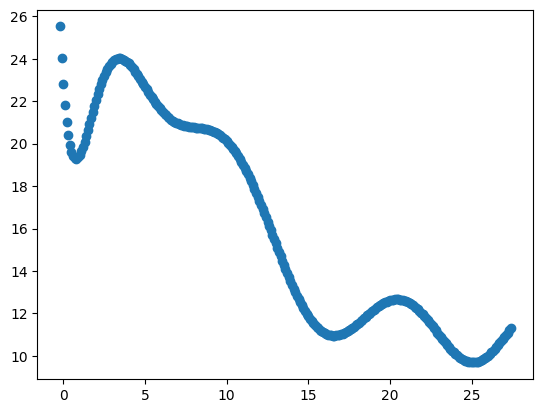

In [22]:
plt.scatter(xx,fl)

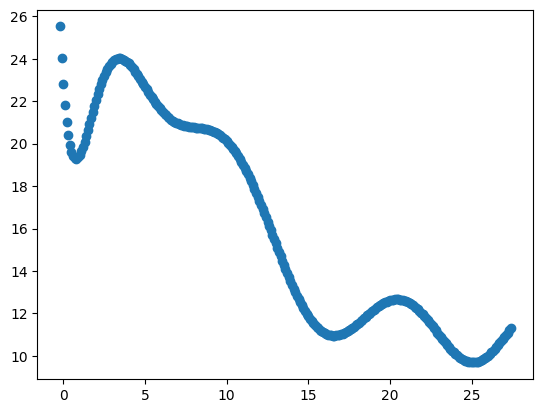

In [23]:
plt.scatter(xx,fn)